##### We first load the iris data set for clustering

In [1]:
import pandas as pd
from plotnine import *
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### We are going to be using petal length and petal width for our clustering algorithm.

##### Recall that k-Means is an unsupervised machine learning algorithm, so it doesn't need the species class but we are going to generate a plot to establish a baseline for how the model should perform.

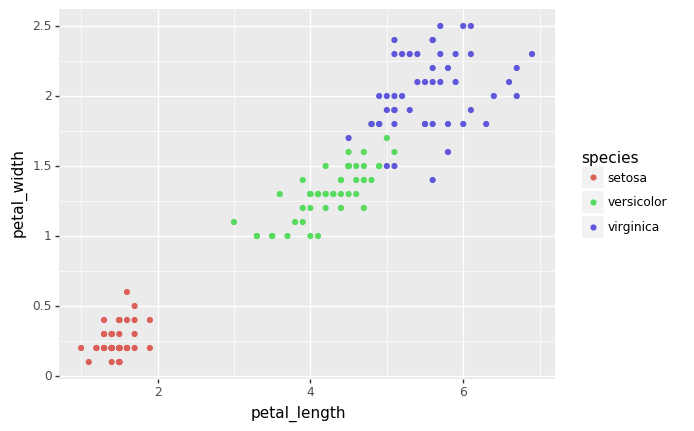

<ggplot: (162169322437)>

In [2]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="species"))+geom_point()

##### We will extract our X variable which is the petal length and width column

In [3]:
X = iris.iloc[:,2:4]
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


##### We import the relevant model function and initialize it

In [4]:
from sklearn.cluster import KMeans

##### n_clusters specifies the k value, we try with 3

In [5]:
km = KMeans(n_clusters = 3, random_state=20)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

##### We can extract the centroids for each cluster after the model stops working and the centroids have converged

In [6]:
centers = km.cluster_centers_

In [7]:
centers

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

##### labels will give us what cluster was assigned to each data point. The order of the data remains the same so we can just attach it back to our iris data frame

In [8]:
labels = km.labels_

In [9]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
iris['new_species'] = labels

##### We can now create a new scatter plot colored with the labels assigned by the kMeans algorithm

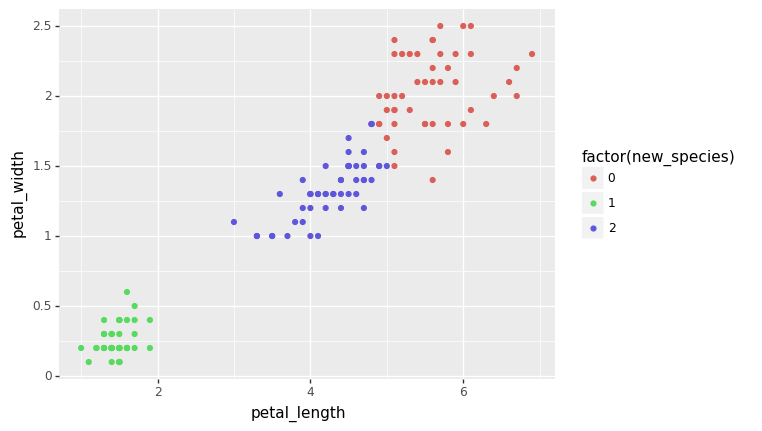

<ggplot: (-9223371874683181189)>

In [12]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="factor(new_species)"))+geom_point()

##### Compare that to the original plot here

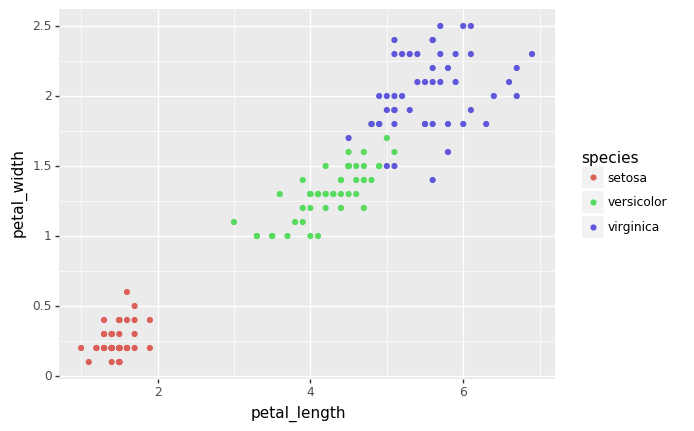

<ggplot: (162171818160)>

In [13]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="species"))+geom_point()

##### Here's the code for finding 5 clusters in our iris data

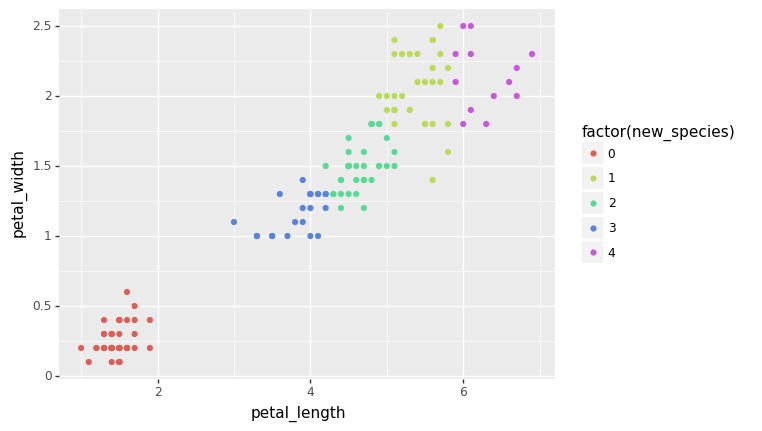

<ggplot: (162171793714)>

In [15]:
km = KMeans(n_clusters = 5, random_state=20)
km.fit(X)
labels = km.labels_
iris['new_species'] = labels
ggplot(iris,aes(x="petal_length",y="petal_width",color="factor(new_species)"))+geom_point()

##### Given a real world problem, you may not have access to classes or labels, in that case you will have to find the optimal k value on your own

##### We can do so by finding the Sum Squared Errors for clusters for a model with arbitary k value, and see which k value lies at the "elbow" of a line plot of k vs SSE

In [16]:
sse = {}

for k in range(1,20):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(X)
    sse[k] = km.inertia_


In [17]:
df = pd.DataFrame({"k":list(sse.keys()),"sse":list(sse.values())})

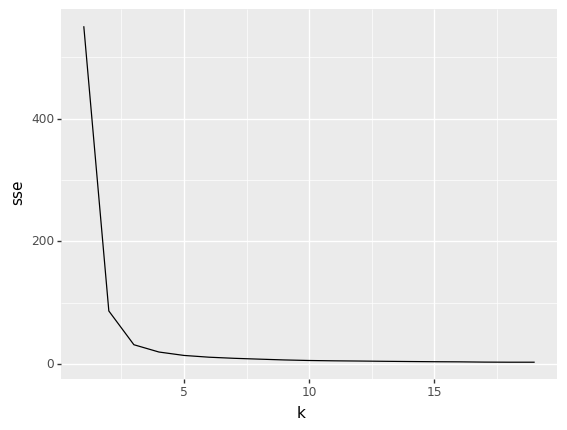

<ggplot: (-9223371874706160517)>

In [18]:
ggplot(df,aes(x="k",y="sse"))+geom_line()

##### We note large reduction in SSE going from k = 1 to 2, and some more from k = 2 to 3. But it then smooths over and there is very small change in SSE.

##### So our optimal k value for the iris data set is 3


##### Is there a way to validate this model?